## 『本次練習內容』
#### 計算 Bounding Box Regression Loss

## 『本次練習目的』
  #### 了解Proposal 與 標註框之間的轉換
  #### 這裡希望學員清楚理解我們要預測的不是實際的(x,y,w,h)，而是他們相對應的偏置量

In [1]:
import cv2
import matplotlib.patches as patches
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
##讀入照片
image=cv2.imread('data/Dog.JPG')

##因為CV2會將照片讀成BGR，要轉回來
image=image[:,:,::-1]

## 先設BBOX格式為[X,Y,W,H]
## 也就是左上角那一點的座標以及BBOX的寬和高

In [4]:
Ground_Truth_BBOX=[1900,700,1800,1800] #g(x,y,w,h)
Region_Proposal=[1800,800,1500,1500] #p(x,y,w,h)

/home/ziv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.
  # Remove the CWD from sys.path while we load stuff.
/home/ziv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The TextWithDash class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Annotation instead.
  # Remove the CWD from sys.path while we load stuff.
/home/ziv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.
  del sys.path[0]
/home/ziv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: Matplot

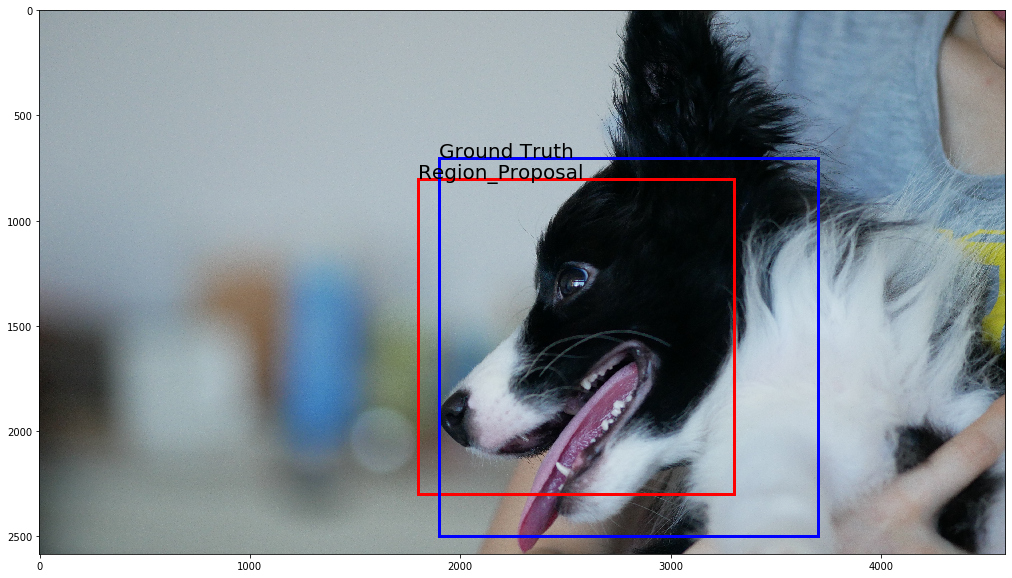

In [5]:
plt.rcParams['figure.figsize'] = (20, 10)

fig,ax = plt.subplots(1)

##畫出圖片
ax.imshow(image)

# 畫BBOX-Prediction
rect = patches.Rectangle((Region_Proposal[0],Region_Proposal[1]),Region_Proposal[2],Region_Proposal[3],linewidth=3,edgecolor='r',facecolor='none',)
ax.text(1800,800,'Region_Proposal',withdash=True,size=20)
# 畫BBOX-Ground_Truth
rect_1 = patches.Rectangle((Ground_Truth_BBOX[0],Ground_Truth_BBOX[1]),Ground_Truth_BBOX[2],Ground_Truth_BBOX[3],linewidth=3,edgecolor='b',facecolor='none')
ax.text(1900,700,'Ground Truth',withdash=True,size=20)

# Add the patch to the Axes
ax.add_patch(rect)
ax.add_patch(rect_1)

plt.show()

## 計算ti，按照公式寫

In [6]:
#(x,y,w,h)
#tx = (gx - px) / pw
#ty = (gy - py) / ph
#tw = log(gw / pw)
#th = log(gh / ph)
tx=(Ground_Truth_BBOX[0] - Region_Proposal[0]) / Region_Proposal[2]
ty=(Ground_Truth_BBOX[1] - Region_Proposal[1]) / Region_Proposal[3]
tw=np.log(Ground_Truth_BBOX[2] / Region_Proposal[2])
th=np.log(Ground_Truth_BBOX[3] / Region_Proposal[3])

In [7]:
print('x偏移量： ',tx)
print('y偏移量： ',ty)
print('w縮放量： ',tw)
print('h縮放量： ',th)

x偏移量：  0.06666666666666667
y偏移量：  -0.06666666666666667
w縮放量：  0.1823215567939546
h縮放量：  0.1823215567939546


## 假設Predict值 dx,dy,dw,dh

In [8]:
dx,dy,dw,dh=[0.05,-0.05,0.12,0.17]

In [9]:
#(dm - tm)2
Loss=np.sum(np.square(np.array([dx, dy, dw, dh]) - np.array([tx, ty, tw, th])))

In [10]:
#Loss值： 0.004591352758604312
print('Loss值：',Loss)

Loss值： 0.004591352758604312
